In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-05-03 03:51:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  90.4MB/s    in 2.1s    

2020-05-03 03:51:20 (90.4 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-05-03 03:51:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp')
zip_ref.close()

local_file = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_file,'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [0]:
rock_dir = os.path.join('tmp/rps/rock')
paper_dir = os.path.join('tmp/rps/paper')
scissors_dir = os.path.join('tmp/rps/scissors')

#print(os.listdir('tmp/rps/rock'))
print(len(os.listdir(rock_dir)))

rock_file = os.listdir(rock_dir)
paper_file = os.listdir(paper_dir)
scissors_file = os.listdir(scissors_dir)



840


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(
        rescale=1./255)

Using TensorFlow backend.


In [0]:

train_generator = train_datagen.flow_from_directory(
	"tmp/rps",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = test_datagen.flow_from_directory(
	"tmp/rps-test-set",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)      

In [0]:
history = model.fit(train_generator,epochs=25, steps_per_epoch=20, validation_data=validation_generator, verbose = 1, validation_steps=3)
model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 22s 1s/step - loss: 0.8419 - accuracy: 0.6311 - val_loss: 0.6165 - val_accuracy: 0.7142
Epoch 2/25
20/20 [==============================] - 19s 942ms/step - loss: 0.6395 - accuracy: 0.6701 - val_loss: 0.5300 - val_accuracy: 0.6783
Epoch 3/25
20/20 [==============================] - 19s 960ms/step - loss: 0.6071 - accuracy: 0.6914 - val_loss: 0.5987 - val_accuracy: 0.6694
Epoch 4/25
20/20 [==============================] - 19s 957ms/step - loss: 0.5776 - accuracy: 0.7099 - val_loss: 0.5588 - val_accuracy: 0.6998
Epoch 5/25
20/20 [==============================] - 19s 952ms/step - loss: 0.4613 - accuracy: 0.7808 - val_loss: 0.4188 - val_accuracy: 0.7930
Epoch 6/25
20/20 [==============================] - 19s 955ms/step - loss: 0.4555 - accuracy: 0.7889 - val_loss: 0.2736 - val_accuracy: 0.9238
Epoch 7/25
20/20 [==============================] - 19s 956ms/step - loss: 0.3619 - accuracy: 0.8413 - val_loss: 0.2053 - val_accuracy: 0.9507
Ep

Populating the interactive namespace from numpy and matplotlib
[[0.38762298 0.5477021  0.40211245]]


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


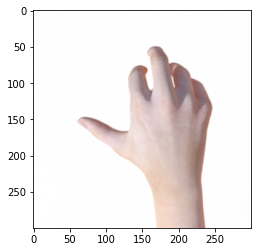

In [0]:
from PIL import Image
import numpy as np
from skimage import transform
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150,150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('tmp/rps/rock/rock01-100.png')
classes = model.predict(image)
print(classes)

img=mpimg.imread('tmp/rps/rock/rock01-100.png')
imgplot = plt.imshow(img)
plt.show()

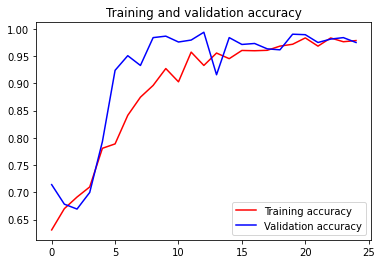

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import cv2


In [0]:
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    if frame is not None:
        h, w, _ = frame.shape

        # preprocess img acquired
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert bgr to rgb
        img = cv2.resize(img, (640, 480)) # resize
        img_mean = np.array([127, 127, 127])
        img = (img - img_mean) / 128
        img = np.transpose(img, [2, 0, 1])
        img = np.expand_dims(img, axis=0)
        img = img.astype(np.float32)

        confidences, boxes = ort_session.run(None, {input_name: img})
        boxes, labels, probs = predict(w, h, confidences, boxes, 0.7)

        for i in range(boxes.shape[0]):
            box = boxes[i, :]
            x1, y1, x2, y2 = box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (80,18,236), 2)
            cv2.rectangle(frame, (x1, y2 - 20), (x2, y2), (80,18,236), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            text = f"face: {labels[i]}"
            cv2.putText(frame, text, (x1 + 6, y2 - 6), font, 0.5, (255, 255, 255), 1)

        cv2.imshow('Video', frame)
        # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()